### 독립 변수와 종속 변수
* Y: dependent / response variable
* X1, X2, ..., Xn: independent / predictor variables 

1) 어떤 변수가 독립변수와 관련이 있는지   
2) 관련이 있다면 어떤 관계를 가지는지 (선형 관계 등)   
3) 독립 변수 Y를 예측하는데 사용할 수 있는 변수인지

## Simple Linear Regression
* simple linear regression model:    
    - 두 변수에 대해(X, Y).
    - 한 변수의 변화에 따른 다른 변수의 변화 정도를 정량화/수치화한 것   
    - 두 변수는 선형관계를 이루고 있다고 있다고 판단할 때 사용(선형 방정식 형태)*   
    - x로부터 y 값을 예측하기 위해 사용할 수 있음


*산점도(scatter plot), 상관계수(ρ)를 이용하여 두 변수의 선형 관계를 확인할 수 있음

### Regression Equation 회귀 방정식
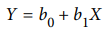
* β0: intercept 절편, β1: slope 기울기
* response variable Y를 가장 잘 예측(predict)할 수 있는 방정식을 찾아야 함

### Least Squares Method
* regression model을 구성하는 최적의 파라미터 β0, β1, ...를 찾기 위해 사용하는 방법
* 어떤 모델을 사용하여 예측한 값(fitted value / predicted value)과 실제값(real value)의 차이인 residual(잔차)를 계산하여 사용

예를 들어 어떤 데이터쌍 (Xi, Yi)가 아래의 관계를 가질때,   
( ei: 데이터가 서로 완벽히 선형관계를 이루지 않아 발생하는 차이(error) )
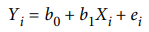

위 식을 추정하여 만든 regression model과,   
해당 모델을 사용하여 Xi에 대한 Yi(y-hat)를 예측한 값은 아래처럼 나타낼 수 있음
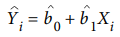

이때 Xi에 대응하는 실제값 Yi와 모델로 예측한 값 y-hat의 차이를 Xi에 대한 residual라고 함


residual들이 서로 값을 상쇄하는 것을 막기 위해 제곱하여 합한 값으로   
학습 시 모델 성능을 평가하며, 이 값을 잔차제곱합(RSS; Residual Sum of Squares)이라고 하며
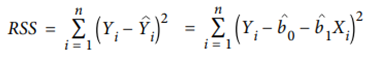
해당 값이 최소가 되는 β0, β1를 찾는 방법을 Least Squares Method (Ordinary Least Squares) 이라고 함
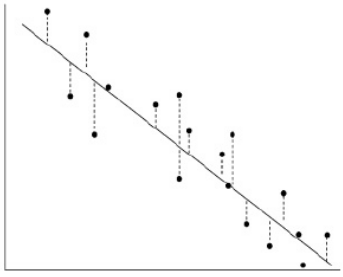

In [ ]:
# Simple Linear Regression 모델 구축 및 학습

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
salarys = pd.read_csv('Salary_data.csv')
salarys.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salarys.columns = ['years', 'salary']
salarys.head()

,years,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


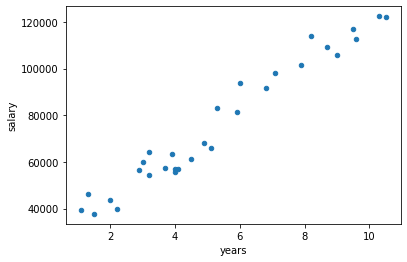

In [4]:
salarys.plot.scatter(x='years', y='salary')
plt.show()

In [5]:
salarys.corr(method='pearson')

,years,salary
years,1.000000,0.978242
salary,0.978242,1.000000


In [6]:
regression_model = LinearRegression()
regression_model.fit(salarys[['years']], salarys['salary'])

LinearRegression()

In [8]:
print(regression_model.coef_, regression_model.intercept_)

[9449.96232146] 25792.200198668717


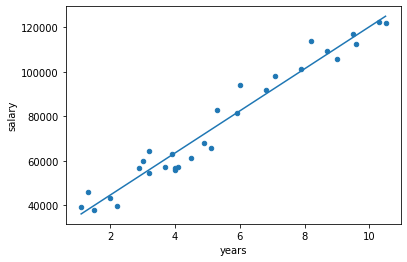

In [10]:
salarys.plot.scatter(x='years', y='salary')
plt.plot(salarys['years'], regression_model.predict(salarys[['years']]))
plt.show()

## Multiple Linear Regression
* Y와 선형 관계를 맺고 있는 X 변수들이 여러개일 때 사용
* Simple Linear Regression과 fitted value와 잔차의 개념 동일하며, 똑같이 LSM을 사용하여 모델을 학습시킴(model fitting)
* 어떤 X 변수의 계수 크기가 클수록,   
X 변수가 Y 변수에 미치는 영향력이 크다 / X가 Y를 많이 설명한다 /   
X와 Y가 관련성이 깊다고 해석함

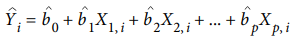

### Assessing the Model 모델 성능 평가 지표
* 평균 제곱근 오차 (RMSE; root mean squared error):   
잔차 제곱의 평균에 제곱근을 취한 값. 낮을수록 모델 성능이 좋다고 판단
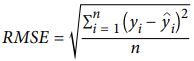


* 결정계수 (coef of determination, R-squared)
    * Y가 가지는 전체 변동(total variability) 중 모델(set of Xs)가 설명할 수 있는 정도를 나타냄
    * 0~1까지 값
    * 높을수록 모델 성능이 좋다고 판단


* 어떤 변수를 regression model 넣을지 판단에 사용하는 용도로,   
해당 변수의 t-statistic과 그 p-value를 사용할 수 있음.   
t-statistic이 높고 p-value 낮을수록 해당 변수가 y랑 관련성이 높다는 뜻으로 해석할 수 있음   
즉. 회귀 모델에 넣는 것이 좋다고 판단함

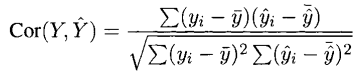
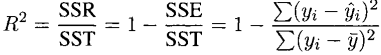

In [ ]:
# Multiple Linear Regression 모델 구축 및 학습
# 구축한 모델로부터 모델 성능 평가 지표 도출 및 모델 판단하기

In [11]:
marketings = pd.read_csv('Marketing_data.csv')
marketings.head() # 독립 변수: 홍보 비용 / 종속 변수: 실제 수익

,youtube,facebook,newspaper,sales
0,84.72,19.20,48.96,12.60
1,351.48,33.96,51.84,25.68
2,135.48,20.88,46.32,14.28
3,116.64,1.80,36.00,11.52
4,318.72,24.00,0.36,20.88


In [12]:
Xs = marketings[['youtube', 'facebook', 'newspaper']]
Y = marketings['sales']

rm = LinearRegression().fit(Xs, Y)
print(rm.coef_, rm.intercept_)

[0.04523544 0.18839783 0.00427949] 3.5058709944650204


In [13]:
# sklearn
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
fitted = rm.predict(Xs)

In [16]:
print('RMSE: ', np.sqrt(mean_squared_error(Y, fitted)))
print('R2 score: ', r2_score(Y, fitted))

RMSE:  1.9862703290302217
R2 score:  0.9004752358539351


In [48]:
# statsmodels
import statsmodels.api as sm # conda install -c conda-forge statsmodels

In [55]:
Xs = marketings[['youtube', 'facebook', 'newspaper']]
Y = marketings['sales']

Xs = sm.add_constant(Xs)
rm = sm.OLS(Y, Xs).fit()

In [24]:
rm.predict(Xs)

0      11.164980
1      26.025064
2      13.766342
3       9.275311
4      22.446400
         ...    
166     6.486818
167     9.768662
168    15.249266
169    28.735611
170    18.093790
Length: 171, dtype: float64

In [25]:
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.09e-83
Time:                        13:38:03   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
youtube        0.0452      0.002     29.830      0.000       0.042       0.048
facebook       0.1884      0.009     20.895      0.000       0.171       0.206
newspaper      0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Selection
* Occams's razor: 성능이 비슷하다면 더 단순한 모델을 사용하는 것이 좋음
* 예측 변수를 추가할수록 학습 데이터에 대해 RMSE 감소 / R2 증가하기 때문에, 다음 지표를 고려할 수 있음

1) adjusted R2
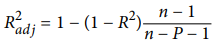
* 점수가 높을수록 좋은 모델이라고 판단
* P가 클수록 adjusted R2의 점수는 낮아짐   
(n: 관측값의 개수 observations / P: 모델에서 사용하는 변수의 개수)


2) AIC (Akaike's Information Criteria) 등

* 낮을수록 좋은 모델이라고 판단
* 사용하는 변수의 개수가 많을수록 값이 커짐


### Stepwise Regression
* 성능을 유지하면서도 예측 변수를 적게 사용하는 모델을 찾는 방법   


1) 변수 선택법: 변수를 하나씩 빼거나 추가하는 식으로 사용.   
　　R2가 증가하지 않거나 AIC가 감소하지 않는 지점 또는   
　　또는 모든 변수가 통계적으로 유의하여 더이상 수정이 불필요하다고 판단하는 지점에서 종료
* backward elimination: 먼저 모든 예측 변수를 사용하여 모델을 만든 후,   
종속 변수 설명에 도움이 되지 않는 변수를 하나씩 삭제하는 방법
* forward selection: 먼저 constant만 사용하여 모델을 만든 후,  
예측 변수를 하나씩 추가하는 방법
* stepwise: forward selection과 backward elemination 융합. 

2) penalized regression 회귀계수 축소법   
　　변수를 삭제 추가하는 대신, 변수의 계수를 조정함.   
　　계수가 0에 가까우면 변수를 삭제한 것과 유사한 의미를 가짐   
　　계수를 계산하는 방법에 따라 아래처럼 나뉨
- lasso: L1 regularization, 절대값 사용, 계수가 0이 될 수 있음 - 영향력 편차가 클 때
- ridge: L2 regularization, 제곱값 사용, 계수가 0이 될 수 없음 - 전반적으로 비슷
- Elastic Net: lasso, ridge 혼합   
어떤 방법이 좋은지는 정해져있지 않아, 여러 모델을 사용하고 결과를 비교, 확인하는 테스트 과정이 필요함

In [ ]:
# 모델 성능 평가 지표 기반 backward elimination 적용 및 결과 확인

In [26]:
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     503.7
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.09e-83
Time:                        13:47:34   Log-Likelihood:                -359.99
No. Observations:                 171   AIC:                             728.0
Df Residuals:                     167   BIC:                             740.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5059      0.400      8.772      0.000       2.717       4.295
youtube        0.0452      0.002     29.830      0.000       0.042       0.048
facebook       0.1884      0.009     20.895      0.000       0.171       0.206
newspaper      0.0043      0.007      0.658      0.511      -0.009       0.017
==============================================================================
Omnibus:                       57.934   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.792
Skew:                          -1.388   Prob(JB):                     4.47e-36
Kurtosis:                       6.891   Cond. No.                         544.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
Xs = marketings[['youtube', 'facebook']]
Y = marketings['sales']

Xs = sm.add_constant(Xs)
rm = sm.OLS(Y, Xs).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     757.8
Date:                Mon, 09 May 2022   Prob (F-statistic):           8.33e-85
Time:                        14:49:10   Log-Likelihood:                -360.21
No. Observations:                 171   AIC:                             726.4
Df Residuals:                     168   BIC:                             735.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5937      0.376      9.555      0.000       2.851       4.336
youtube        0.0453      0.002     30.060      0.000       0.042       0.048
facebook       0.1901      0.009     22.045      0.000       0.173       0.207
==============================================================================
Omnibus:                       59.525   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              174.220
Skew:                          -1.411   Prob(JB):                     1.47e-38
Kurtosis:                       7.061   Cond. No.                         507.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Weighted Regression
* 데이터셋을 구성하는 각 열(row, instance, observation,...)이 가지는 중요도에 따라 weight(가중치)를 부여하여 회귀분석 모델을 만드는 것
* sample_weight 파라미터를 추가하는 것으로 해당 기능을 사용할 수 있음   
model = LinearRegression().fit(독립변수s, 종속변수, sample_weight=각 열에 대한 가중치)

## 회귀분석을 사용한 예측(prediction)
* 일반적으로 regression model을 사용한 예측은,   
예측에 사용할 독립 변수들에 값들이, 모델 학습에 사용한 독립 변수 데이터 범위 안에 있을 때만 유용하게 사용할 수 있음


* Prediction Interval   
앞서 표본집단의 추정량를 이용하여 모집단 매개변수 추정치를 범위로 표현하기 위해 confidence interval를 사용했듯이,   
예측값이 가질 수 있는 범위를 표현하기 위해 사용


* 이러한 예측값의 모호함 / 불확실성의 원인
    * 예측 변수 및 변수의 계수의 불확실성
    * 개별 데이터 instance가 내재하는 오류(bias 등)

In [ ]:
# Multiple Linear Regression에서 형성한 모델을 사용하여,
# permutation을 통한 prediction interval 도출

In [188]:
def prediction_interval(df, predictors, dependence, x0, alpha = 0.05):
    # 신뢰수준 90%
    # Number of training samples
    n = df.shape[0]
    
    results = np.array([])
    for _ in range(1000):
        # 데이터셋으로부터 같은 크기의 데이터셋을 복원 랜덤 추출하여 생성
        boot_sample =  df.sample(n, replace=True)
        Xs = boot_sample[predictors]
        Y = boot_sample[dependence]
        
        # 모델을 학습하여, Y값 예측(-> y-hat)
        lm = LinearRegression().fit(Xs, Y)
        y_hat = lm.predict(x0)
        
        # 데이터셋에서 랜덤으로 값을 가져와,
        # 실제값과 예측값이 가지는 잔차 계산
        idx = random.sample(range(n), 1)
        residual = Y.iloc[idx] - lm.predict(Xs.iloc[idx])
        
        # 모델 예측값에, 계산한 잔차를 더하여 기록
        # (모델이 가지는 불확실성과 개별 데이터가 가지는 불확실성을 모두 반영)
        results = np.append(results, y_hat + residual)
        
    return (np.percentile(results, alpha*100),
            np.percentile(results, 100 - alpha*100))

In [190]:
Xs = marketings[['youtube', 'facebook']]
Y = marketings['sales']
x = pd.DataFrame([[100.1, 22.0]], columns = ['youtube', 'facebook'])

prediction_interval(marketings, ['youtube', 'facebook'], 'sales', x)

(8.416489825133807, 14.936037077255628)

## Interpreting the Regression Equation

* 일반적으로 어떤 독립변수 X의 계수를 통해   
종속변수에 양/음의 영향을 미치는지. 그리고 어느 정도 영향을 미치는지 해석할 수 있으나,   
아래 같은 상황에서는 계수가 왜곡된 의미를 가질 수 있음   


1) correlated predictors   
　　(multiple regression) 데이터셋의 독립변수끼리 서로 상관관계를 가질 수 있음   
　　이 경우 변수 간 interaction로 인해 계수의 값이 상식과 다를 수 있음

2) multicollinearity 다중공선성   
　　예측 변수 간 상관관계가 매우 강하여,   
　　어떤 예측 변수가 다른 예측 변수들을 사용한 linear model로 설명/표현될 수 있을 때

3) confounding variable   
　　correlated로 인해, 예측변수의 계수가 이상한 경우,   
　　실제로는 중요한 변수를 중요하지 않은 변수라고 오인할 수 있음

* 상관 관계를 가지는 변수들은 서로 중복되는 정보라고 판단하고 일부를 삭제하여 사용

In [ ]:
# 계수의 의미가 이상한 사례 확인
# 다중 공선성 확인(독립 변수간 산점도, VIF)
# 모델 변형 및 결과 확인

In [ ]:
# 다중공선성 파악하는 방법
# 1. 독립변수 간에 산점도 / corr
# 2. VIF

In [30]:
house_prices = pd.read_csv('house_prices.csv')
house_prices.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [31]:
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor # VIF

In [57]:
Xs = house_prices[['area', 'bedrooms', 'bathrooms']]
Y = house_prices['price']

Xs = sm.add_constant(Xs)

rm = sm.OLS(Y, Xs).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     4230.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        14:49:17   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6024   BIC:                         1.691e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.007e+04   1.04e+04      0.972      0.331   -1.02e+04    3.04e+04
area         345.9110      7.227     47.863      0.000     331.743     360.079
bedrooms   -2925.8063   1.03e+04     -0.285      0.775    -2.3e+04    1.72e+04
bathrooms   7345.3917   1.43e+04      0.515      0.607   -2.06e+04    3.53e+04
==============================================================================
Omnibus:                      367.658   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.116
Skew:                           0.536   Prob(JB):                     9.40e-77
Kurtosis:                       2.503   Cond. No.                     1.16e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

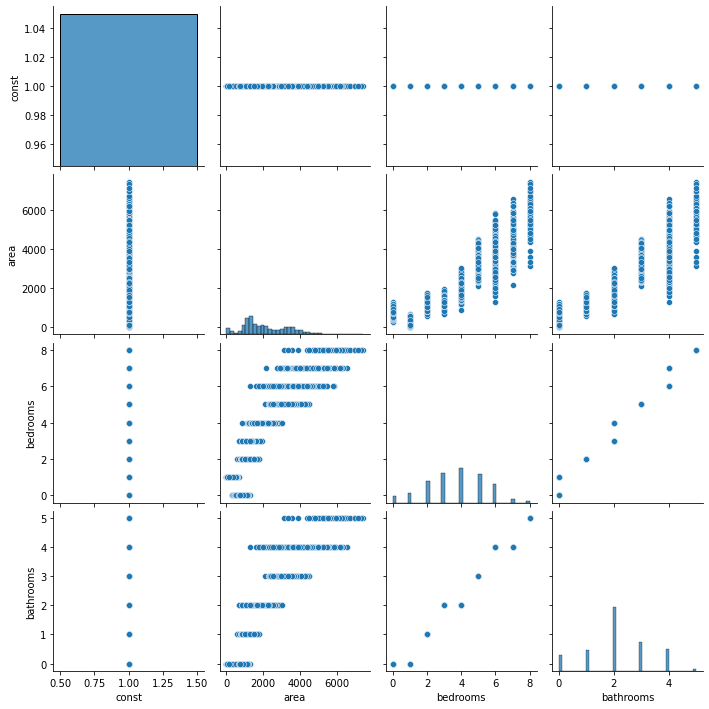

In [43]:
sns.pairplot(Xs)
plt.show()

In [34]:
house_prices.corr(method='pearson')

,house_id,area,bedrooms,bathrooms,price
house_id,1.000000,0.005591,0.008959,0.011725,0.005768
area,0.005591,1.000000,0.901623,0.891481,0.823454
bedrooms,0.008959,0.901623,1.000000,0.972768,0.743435
bathrooms,0.011725,0.891481,0.972768,1.000000,0.735851
price,0.005768,0.823454,0.743435,0.735851,1.000000


In [ ]:
# VIF: 어떤 독립 변수가 다른 독립 변수들과 선형 관계를 가지는지 확인할 수 있는 지표

In [58]:
Xs = house_prices[['area', 'bedrooms', 'bathrooms']]
Y = house_prices['price']

Xs = sm.add_constant(Xs)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
vif['predictor'] = Xs.columns
vif
# 5 이상 (유의) / 10 이상 (다중공선성 있다고 판단 - 변수 제거하여 사용)

,VIF,predictor
0,7.327102,const
1,5.458190,area
2,20.854484,bedrooms
3,19.006851,bathrooms


In [59]:
Xs = house_prices[['area', 'bathrooms']]
Y = house_prices['price']

Xs = sm.add_constant(Xs)

rm = sm.OLS(Y, Xs).fit()
rm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     6346.
Date:                Mon, 09 May 2022   Prob (F-statistic):               0.00
Time:                        14:49:24   Log-Likelihood:                -84517.
No. Observations:                6028   AIC:                         1.690e+05
Df Residuals:                    6025   BIC:                         1.691e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8215.9441   8063.295      1.019      0.308   -7590.999     2.4e+04
area         345.2352      6.827     50.566      0.000     331.851     358.619
bathrooms   3834.7685   7223.513      0.531      0.596   -1.03e+04     1.8e+04
==============================================================================
Omnibus:                      367.677   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              350.604
Skew:                           0.536   Prob(JB):                     7.37e-77
Kurtosis:                       2.504   Cond. No.                     5.71e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [60]:
Xs = house_prices[['area', 'bathrooms']]
Y = house_prices['price']

Xs = sm.add_constant(Xs)

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(Xs.values, i) for i in range(Xs.shape[1])]
vif['predictor'] = Xs.columns
vif
# 5 이상 (유의) / 10 이상 (다중공선성 있다고 판단 - 변수 제거하여 사용)

,VIF,predictor
0,4.438137,const
1,4.871816,area
2,4.871816,bathrooms
